In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.200d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.50d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.300d.txt
/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.100d.txt
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [2]:
df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
rslt_df = df[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
rslt_df2 = df[(df['toxic'] == 1) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
new1 = rslt_df[['id', 'comment_text', 'toxic']].iloc[:23000].copy() 
new2 = rslt_df2[['id', 'comment_text', 'toxic']].iloc[:900].copy()
new = pd.concat([new1, new2], ignore_index=True)

In [3]:
new.head()

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [4]:
output=['toxic','severe_toxic','obscene','threat','insult','identity_hate']


Text(0.5, 1.0, 'Count of labels')

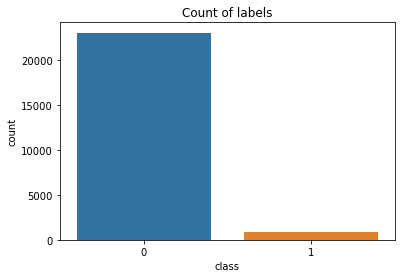

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(new.toxic)
plt.xlabel('class')
plt.title('Count of labels')

> A we can clearly see that data is skewed therefore we will oversample it.

In [6]:
import nltk
tk=nltk.tokenize.TreebankWordTokenizer()
comment_tokens = [tk.tokenize(sent) for sent in new['comment_text']]

In [7]:
len(comment_tokens)

23900

In [8]:
from nltk.corpus import stopwords
for i in range(len(comment_tokens)):
    comment_tokens[i] = [w for w in comment_tokens[i] if w not in stopwords.words('english')]

In [9]:
#training own word2vec model
## from gensim.models import Word2Vec

## word2vec = Word2Vec(comment_tokens, min_count=1,size=300)
## vocabulary = word2vec.wv.vocab

## word2vec.save("my_word2vec.model")
## 
## def document_vector(doc):
 ##     """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
 ##    doc = [word for word in doc if word in model.wv.vocab]
##     print(doc)
    # return np.mean(word2vec[doc], axis=0)
## import pickle
## with open("w2v_list.txt", "wb") as fp:   #Pickling
   ##  pickle.dump(list_w2v, fp)

## Google’s Word2vec Pretrained Word Embedding
Word2Vec is one of the most popular pretrained word embeddings developed by Google. Word2Vec is trained on the Google News dataset (about 100 billion words). It has several use cases such as Recommendation Engines, Knowledge Discovery, and also applied in the different Text Classification problems.

The architecture of Word2Vec is really simple. It’s a feed-forward neural network with just one hidden layer. Hence, it is sometimes referred to as a Shallow Neural Network architecture.

Depending on the way the embeddings are learned, Word2Vec is classified into two approaches:

1. Continuous Bag-of-Words (CBOW)

2. Skip-gram model

For example, consider the sentence: “I have topped at times but I never stopped trying”.  Let’s say we want to learn the embedding of the word “topped”. So, here the focus word is “topped”.

The first step is to define a context window. A context window refers to the number of words appearing on the left and right of a focus word. The words appearing in the context window are known as neighboring words (or context). Let’s fix the context window to 1 and then see input and output for both approaches:

Continuous Bag-of-Words: Input = [ have, at ],  Output = topped

Skip-gram: Input = topped, Output = [ have, at ]

As you can see here, CBOW accepts multiple words as input and produces a single word as output whereas Skip-gram accepts a single word as input and produces multiple words as output.

So, let us define the architecture according to the input and output. But keep in mind that each word is fed into a model as a one-hot vector:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-12-13-05-42.png)

### Pretrained word2vec Implementation

In [10]:
# using pretrained model
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin', binary=True)

In [11]:
vocabulary = model.wv.vocab
len(vocabulary)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


3000000

In [12]:
model.most_similar('bengali')

[('bhalo', 0.7301204204559326),
 ('theke', 0.7238638401031494),
 ('angrezi', 0.7148141860961914),
 ('kotha', 0.7060301303863525),
 ('dadi', 0.7035724520683289),
 ('srk', 0.7010512351989746),
 ('Aapne', 0.7001107335090637),
 ('mil_gaya', 0.6931058764457703),
 ('kapoor', 0.6922467947006226),
 ('purana', 0.6918690204620361)]

In [13]:
model.most_similar('india')

[('indian', 0.6967039704322815),
 ('usa', 0.6836211085319519),
 ('pakistan', 0.6815168261528015),
 ('chennai', 0.6675504446029663),
 ('america', 0.6589399576187134),
 ('sri_lanka', 0.6498200297355652),
 ('canada', 0.6490967869758606),
 ('australia', 0.6368584036827087),
 ('mexico', 0.6239137649536133),
 ('uk', 0.6221641898155212)]

In [14]:
model.most_similar('football')

[('soccer', 0.731354832649231),
 ('fooball', 0.7139959335327148),
 ('Football', 0.7124834060668945),
 ('basketball', 0.6682467460632324),
 ('footbal', 0.6649289131164551),
 ('athletics', 0.6265192627906799),
 ('gridiron', 0.6191604733467102),
 ('baseball', 0.6162000894546509),
 ('footballl', 0.6069177389144897),
 ('sports', 0.5927178263664246)]

In [15]:
# importing bokeh library for interactive dataviz
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=500, plot_height=400, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:5000]]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.wv.vocab.keys())[:5000]

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df,color = 'darkcyan')
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.112s...
[t-SNE] Computed neighbors for 5000 samples in 14.994s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.913500
[t-SNE] KL divergence after 250 iterations with early exaggeration: 102.172676
[t-SNE] KL divergence after 1000 iterations: 2.407070


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [16]:
 def document_vector(doc):
     """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
     doc = [word for word in doc if word in model.wv.vocab]
     print(doc)
     return np.mean(model[doc], axis=0)

In [17]:
# comment_tokens

In [18]:
documents = []
for x in comment_tokens:
    document = [word for word in x if word in model.wv.vocab]
    documents.append(document)
#now this document have only those words which are present in our model's vocab
# documents   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
len(documents)

23900

In [20]:
type(documents)

list

In [21]:
#checking if there is any empty list inside documents
counter = 0
for i in range (0,len(documents)):
    if documents[i] == []:
        counter += 1
print(counter)

30


> So there were in total this much empty vectors(output of above cell) which were form due to removal of words whch are not present in our pretrained model's vocab, now we will fill those vectors with zeros

In [22]:
list_v=[]
for i in range (0,len(documents)):
    if documents[i] == []:
        list_v.append(np.zeros(300,))
    else:
        list_v.append(np.mean(model[documents[i]], axis=0))
        

In [23]:
len(list_v)

23900

## SMOTE 

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

![smote](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [24]:
from collections import Counter
print('Original dataset shape before smote %s' % Counter(new['toxic']))
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(list_v, new['toxic'])
print('Original dataset shape after smote %s' % Counter(y))

Original dataset shape before smote Counter({0: 23000, 1: 900})


Using TensorFlow backend.


Original dataset shape after smote Counter({0: 23000, 1: 23000})


In [25]:
#test-train split
from sklearn.model_selection import train_test_split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X,y, test_size=0.3, random_state=42)

## LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=1000)
clf.fit(Xw_train,yw_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predicted_res=clf.predict(Xw_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(yw_test,predicted_res)
accuracy

0.8763043478260869

In [28]:
import numpy as np

z=1.96
interval = z * np.sqrt( (0.8244 * (1 - 0.8244)) / yw_test.shape[0])
interval

0.006348158702709204

> Confidence interval(95%) - [87.15  88.41]